In [61]:
import json
from torchvision.io import decode_image
from torchvision.utils import draw_bounding_boxes
import matplotlib.pyplot as plt
from torchvision.transforms.v2 import functional as F_tv
from torchvision.transforms import v2 as transforms
import torch
from torchvision.datasets import CocoDetection

In [3]:
with open('./data/dfg/train.json') as f:
    annotation_data = json.load(f)

In [4]:
annotation_data.keys()

dict_keys(['images', 'categories', 'annotations', 'info'])

In [11]:
images = {x['id']: x for x in annotation_data['images']}

In [14]:
annotations_by_images = {}
for ann in annotation_data['annotations']:
    if ann['image_id'] not in annotations_by_images:
        annotations_by_images[ann['image_id']] = []
    annotations_by_images[ann['image_id']].append(ann)

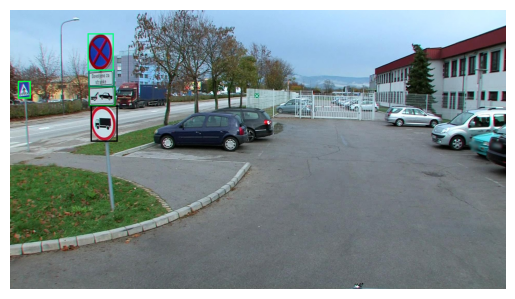

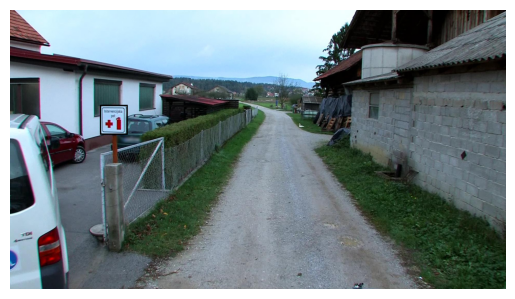

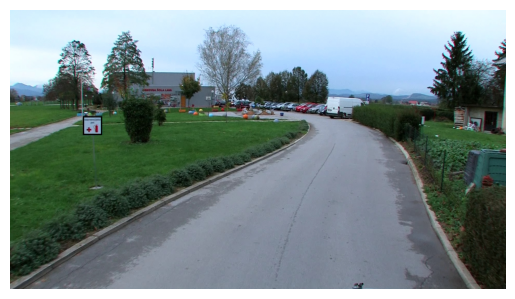

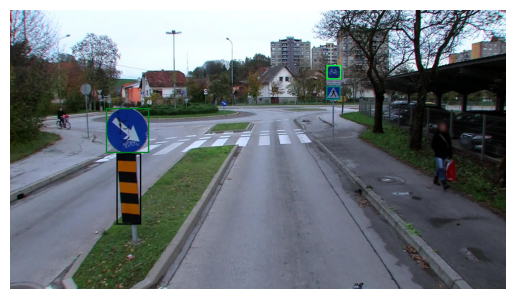

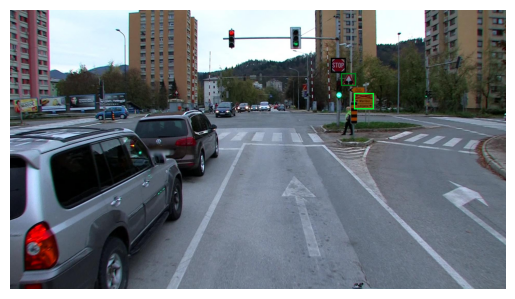

In [68]:
i = 0
for k, v in images.items():
    img = decode_image(f'./data/dfg/JPEGImages/{v["file_name"]}')
    img_annotations = annotations_by_images[k]
    bboxes = torch.tensor([ann['bbox'] for ann in img_annotations])
    bboxes = torch.vstack((bboxes[:,0], bboxes[:,1], bboxes[:,0] + bboxes[:,2], bboxes[:,1] + bboxes[:,3])).T
    img = draw_bounding_boxes(img, bboxes, width=5)
    img_to_show = F_tv.to_pil_image(img)
    plt.imshow(img_to_show)
    plt.axis('off')
    plt.show()
    i += 1
    if i == 5:
        break

loading annotations into memory...
Done (t=0.69s)
creating index...
index created!


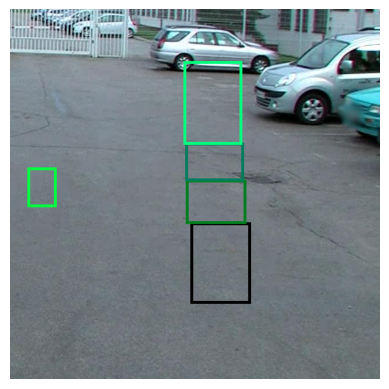

In [70]:
dataset = CocoDetection('./data/dfg/JPEGImages',
                        './data/dfg/train.json',
                        transforms=transforms.RandomCrop((640, 640))
                       )

img, annotations = dataset[0]
img = F_tv.to_image(img)

bboxes = torch.tensor([ann['bbox'] for ann in annotations])
bboxes = torch.vstack((bboxes[:,0], bboxes[:,1], bboxes[:,0] + bboxes[:,2], bboxes[:,1] + bboxes[:,3])).T
img = draw_bounding_boxes(img, bboxes, width=5)
img_to_show = F_tv.to_pil_image(img)
plt.imshow(img_to_show)
plt.axis('off')
plt.show()